Name:Praveen D

Ref.no:212222240076

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image=X_train[100]

In [ ]:
single_image.shape

(28, 28)

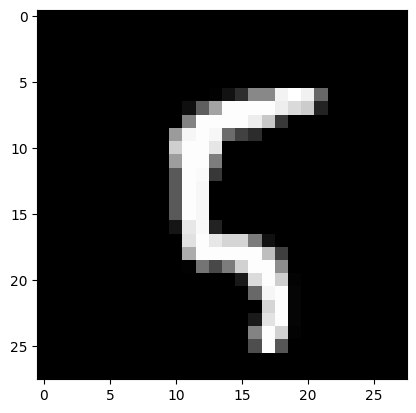

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[100]

5

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled=X_train/255.0
X_test_scaled=X_test/255.00

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

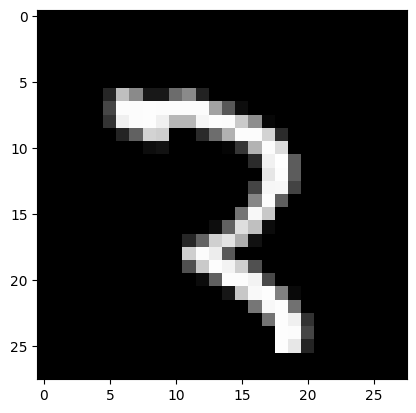

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model= keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=8,batch_size=128, validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/8
469/469 [==============================] - 30s 63ms/step - loss: 0.3075 - accuracy: 0.9104 - val_loss: 0.1200 - val_accuracy: 0.9646
Epoch 2/8
469/469 [==============================] - 21s 44ms/step - loss: 0.0950 - accuracy: 0.9716 - val_loss: 0.0799 - val_accuracy: 0.9748
Epoch 3/8
469/469 [==============================] - 19s 41ms/step - loss: 0.0646 - accuracy: 0.9806 - val_loss: 0.0587 - val_accuracy: 0.9809
Epoch 4/8
469/469 [==============================] - 20s 43ms/step - loss: 0.0509 - accuracy: 0.9849 - val_loss: 0.0494 - val_accuracy: 0.9829
Epoch 5/8
469/469 [==============================] - 23s 49ms/step - loss: 0.0410 - accuracy: 0.9874 - val_loss: 0.0554 - val_accuracy: 0.9811
Epoch 6/8
469/469 [==============================] - 20s 42ms/step - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.0473 - val_accuracy: 0.9830
Epoch 7/8
469/469 [==============================] - 20s 42ms/step - loss: 0.0270 - accuracy: 0.9918 - val_loss: 0.0524 - val_accuracy: 0.9819

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.307516,0.910433,0.120008,0.9646
1,0.095028,0.971600,0.079852,0.9748
2,0.064606,0.980633,0.058748,0.9809
3,0.050891,0.984883,0.049414,0.9829
4,0.040986,0.987417,0.055417,0.9811


<Axes: >

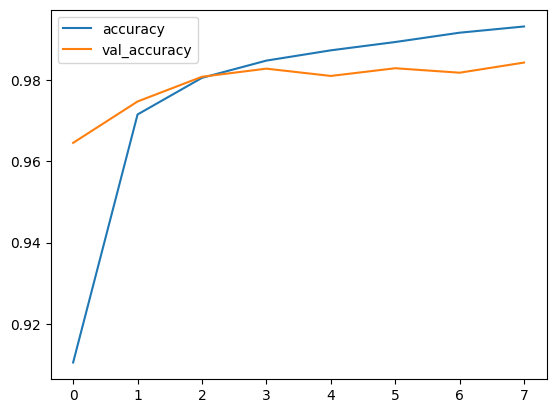

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

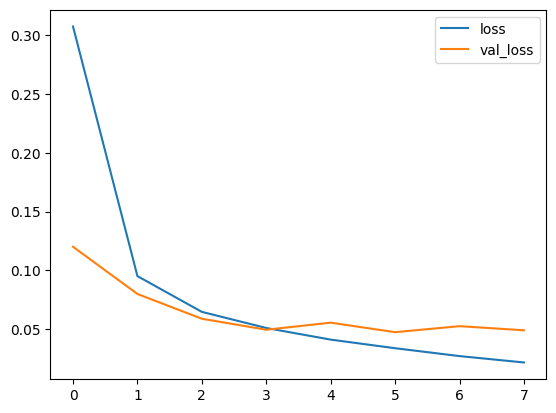

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 1s 4ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 976    0    0    0    0    2    1    1    0    0]
 [   0 1131    3    0    0    0    1    0    0    0]
 [   3    2 1017    2    2    0    0    5    1    0]
 [   0    0    1  998    0    4    0    3    3    1]
 [   0    0    0    0  978    0    2    0    0    2]
 [   1    0    0    5    0  882    3    0    1    0]
 [   5    3    0    0    3    5  941    0    1    0]
 [   1    3    7    2    1    0    0 1012    1    1]
 [   7    1    6    3    1    5    1    4  939    7]
 [   4    1    1    5   11   10    0    6    1  970]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
img = image.load_img('9.png')
type(img)

PIL.PngImagePlugin.PngImageFile

In [ ]:
img = image.load_img('9.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)
print(x_single_prediction)

1/1 [==============================] - 0s 68ms/step
[8]


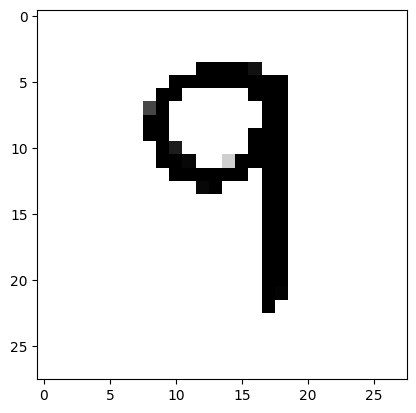

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

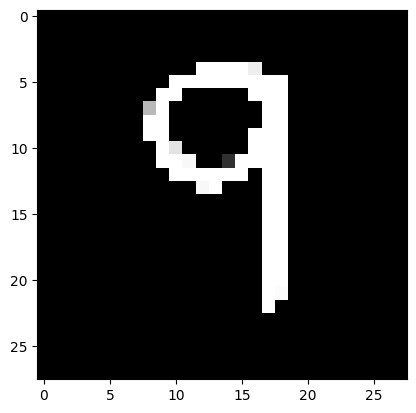

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0
plt.imshow(img_28_gray_inverted_scaled.reshape(28,28),cmap='gray')

In [ ]:
x_single_prediction = np.argmax(model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)), axis=1)

1/1 [==============================] - 0s 24ms/step


In [ ]:
print(x_single_prediction)

[9]
